Earth Observation DataScience<a id="topEODataScience"></a>
===

## Ressources

* [Toward Science - satellite-imagery-analysis-using-python](https://towardsdatascience.com/satellite-imagery-analysis-using-python-9f389569862c)
* [Youtube Advanced - Analysis of Satellite Imagery Using Python](https://www.youtube.com/watch?v=Jg7IcrpBfK4)
* [EO Data Science](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/)
* https://www.youtube.com/watch?v=Pz-96PMm5x8 A Short Course on Earth Observation Methods and Data


ArcGIS pour l'image
Mosaic Dataset : Optimal data model for managing imagery

https://www.lfd.uci.edu/~gohlke/pythonlibs/


Land Cover Classification of Satellite Imagery using Python
Land cover classification of Sundarbans satellite imagery using K-Nearest Neighbor(K-NNC), Support Vector Machine (SVM), and Gradient Boosting classification algorithms with Python.


## Lexique
* Satellites de référence :
    - Landsat (Nasa)
    - Sentinel (surtout sentinel 2 pour le monitoring agro et des forets
* Bands : bande de fréquence de capture de l'image sur le spectre electromagnétique (IR, UV, visible...). Assemblés, ils forment un data cube
* Raster Image : matrice / grille / tableau de pixel, où chaque case contient la "puisance" du pixel.
* TIFF : Tag Image File Format, use lossless compression to maintain image integrity and clarity and are often used for professional photography.
* TFW : TIFF utilisé par des applications GIS, contenant en plus la localisation, la taille et la rotation de l'image. Utile pour localiser l'image et savoir ce qu'elle représente (notamment quand on zoom, différencier par exemple un champs en France ou à Taiwan, ça peut ne pas être simple.. pourtant ce n'est pas du tout les mêmes lieux)
* PRJ : semblable au TFW, il contient en plus des informations concernant le système de coordonnées employé. Devenu un standard, il est intéressant de le comprendre ([bonne source](https://vsp.pnnl.gov/help/vsample/ESRI_PRJ_File.htm))
* GeoJSON : Standard open pour l'échange de data geospatiales, basé sur le JSON



## Sommaire

# Earth Observation

Satellites to see the entire world, to havea global view (especially for climate change)

Type :
- Optical : like a picture from space, need some light (IR, visible, UV)
- Radar : unaffected by cloud

![](https://puu.sh/HUBvd/05148e8b02.png)

## Sentinel-1
- Radar satellite, 20m / pixel
- Speckle

## Sentinel-2
- The most used Sentinel
- 13 bands
- 10 / 20 / 60m per pixel

## Sentinel-3
- 11 bands (SLSTR (include IR)) 500m / 1km
- 21 bands (OLCI)

## Sentinel-5p
- Atmosphere monitoring (pollution)
- 5.5 x 3.5 km / pixel, and daily coverage

## Landsats
- 80m / 30m per pixel
- like Sentinel-2

For mass processing, use batch:
- Asynchronous
- Low cost
- quicker

On Sentinel Hub : Statistical API, Machine Learning API (eo-flow, eo-learn with torch)


## Remote sensing concept
* Band combinations: place satellite bands in RGB bands
* Indices : NDVI (Normalized Difference Vegetation Index) = (NIR - RED) / (NIR + RED)
* Custom Scripts : mapping input / output 



```js
function setup() {
    return {
        input: ["B02", "B03", "B04", "B08", "B11", "B12", "dataMask"],
        output: { bands: 4 }
      };
}

function evaluatePixel(samples) {
	var NDWI=index(samples.B03, samples.B08); 
	var NDVI=index(samples.B08, samples.B04);
	var INDEX= ((samples.B11 - samples.B12) / (samples.B11 + samples.B12))+(samples.B08);

  	if((INDEX>0.1)||(samples.B02>0.1)||(samples.B11<0.1)||(NDVI>0.3)||(NDWI > 0.1)){
  		return[2.5*samples.B04, 2.5*samples.B03, 2.5*samples.B02, samples.dataMask]
	}
	else {
 	return [1, 0, 0, samples.dataMask]
	}
}
```

In [ ]:
from tools import find_file

---

## Intro

Source pour ce tuto : [ earthdatascience.org/use-data-open-source-python ](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/)





## Sommaire



[Back to top](#topEODataScience)

---

In [2]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

---

# 1. Timeseries
## 1.1. Intro

Ayant déjà les data en local, je vais directement importer via Pandas. Sinon il faut run cela :
```python
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()
```

De mon côté, voici mon code, et j'ai de base initialisé ma colonne date comme mon index (plus pratique je trouve) :

In [3]:
# Import the file
print('File location :', find_file('805325'), '\n')
boulder_precip_2003_2013 = pd.read_csv(find_file('805325'), index_col='DATE', parse_dates=True)

# Show the dataframe
print("DataFrame shapes :", boulder_precip_2003_2013.shape, '\n')
boulder_precip_2003_2013.head(3)

File location : .\Data\precipitation\805325-precip-daily-2003-2013.csv 

DataFrame shapes : (1840, 8) 



,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,


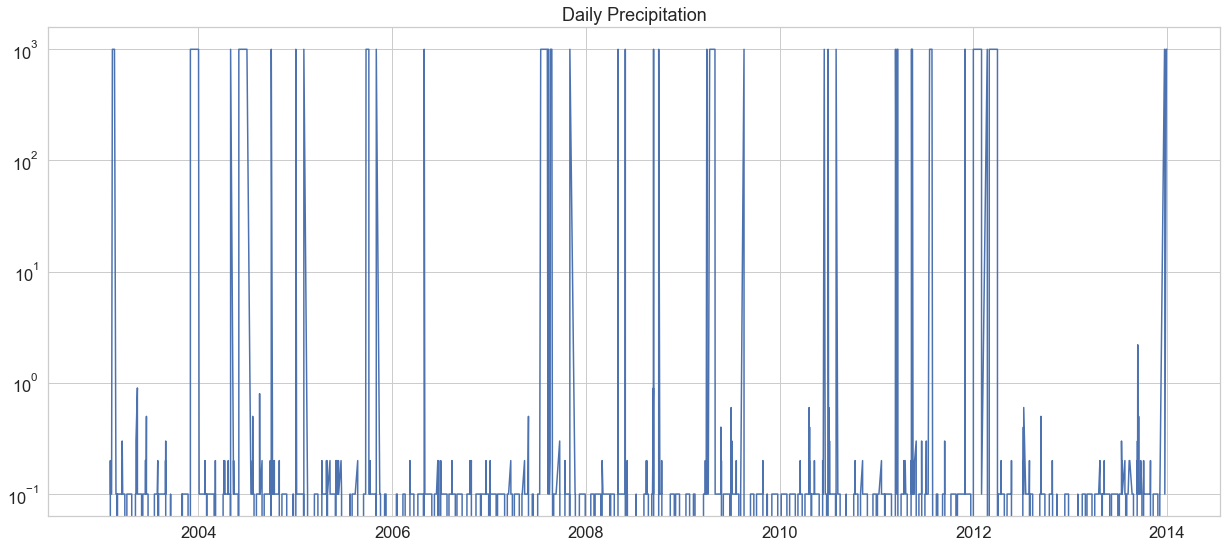

In [4]:
plt.figure(figsize=(21, 9))
plt.plot(boulder_precip_2003_2013.HPCP)
plt.title("Daily Precipitation")
plt.yscale("log")
plt.show()

In [5]:
from IPython.display import YouTubeVideo, IFrame


# data information
print(find_file("PRECIP_HLY_documentation"))
IFrame(find_file("PRECIP_HLY_documentation"), width=600, height=400)

.\Data\precipitation\PRECIP_HLY_documentation.pdf


Apparamment, les pics de données ne sont pas réalistes...
> "The values 99999 means the data value is missing"

In [6]:
boulder_precip_2003_2013.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,


In [7]:
# Regardons l'index
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [8]:
# Regardons la colonne intéressante
boulder_precip_2003_2013.HPCP.describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [9]:
# Regardons la quantité de data erronées
boulder_precip_2003_2013[boulder_precip_2003_2013.HPCP == 999.99].shape[0] / boulder_precip_2003_2013.shape[0]

0.051086956521739134

In [10]:
# Re-regardons la description, sans les data erronées
boulder_precip_2003_2013[boulder_precip_2003_2013.HPCP != 999.99].HPCP.describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

In [11]:
print(f'''Station {boulder_precip_2003_2013.STATION_NAME.unique()} ({boulder_precip_2003_2013.STATION.unique()})
      position (lat, lon, alt) : [{boulder_precip_2003_2013.LATITUDE.unique()}, {boulder_precip_2003_2013.LONGITUDE.unique()}, {boulder_precip_2003_2013.ELEVATION.unique()}]''')
print('\nMeasurement Flag values :', ', '.join(boulder_precip_2003_2013['Measurement Flag'].unique()))
print('\nQuality Flag values :', ', '.join(boulder_precip_2003_2013['Quality Flag'].unique()), '\n')
boulder_precip_2003_2013.dtypes

Station ['BOULDER 2 CO US'] (['COOP:050843'])
      position (lat, lon, alt) : [[40.03389 40.0338 ], [-105.28111 -105.2811 ], [1650.5]]

Measurement Flag values : g,  , {, }, [, ]

Quality Flag values :  , q, Z 



STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

On peut remarquer que le dataset ne possède les données que d'une seule station sol, dont on a relevé les données à une fréquence variables. Il y a 5% de data pas utilisable (HPCP = 999.99). Les flags contiennent respectivement les valeurs suivantes :
- Measurement Flag values : 
    - 'g' : Only used for day 1, hour 0100, when precipitation amount is zero.
    - ' '
    - '{'
    - '}'
    - '['
    - ']'
- Quality Flag values : 
    - ' '
    - 'q' : An hourly value excludes one or more 15 minute periods. Lowest data resolution is 15 minutes
    - 'Z' : Indicates probable amounts as a result of melting frozen precipitation. This flag may be used to identify those sites that are deficient in the manner the snow shields are employed.

D'après la doc,
- { et } marquent respectivement le début et la fin d'une période où la data a été supprimée (car illisible)
- [ et ] marquent respectivement le début et la fin d'une période où les données sont manquantes


HPCP: The amount of precipitation recorded at the station for the hour ending at the time specified for DATE above given in hundredths of inches or tenths of millimeters depending on user’s specification of standard or metric units. The values 99999 means the data value is missing. Hours with no precipitation are not shown.


```python
boulder_precip_2003_2013[boulder_precip_2003_2013['Measurement Flag'] == ']']
```

On va reopen et changer les value nulles :

In [12]:
boulder_precip_2003_2013 = pd.read_csv(find_file('805325'), index_col='DATE',
                                       parse_dates=True, na_values=[999.99])
boulder_precip_2003_2013.tail(3)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-31 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],


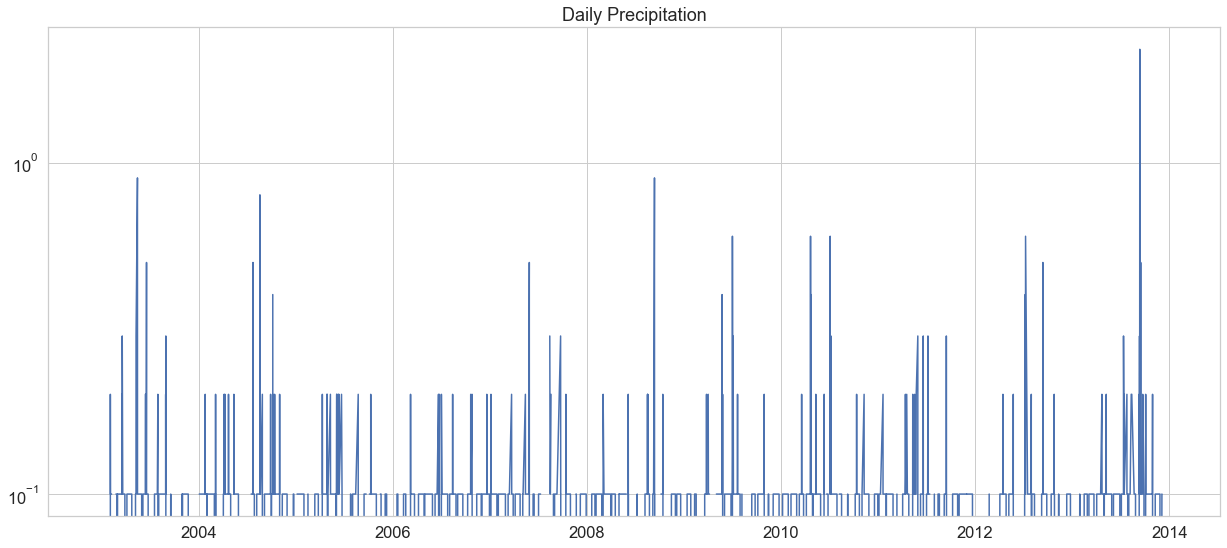

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [13]:
plt.figure(figsize=(21, 9))
plt.plot(boulder_precip_2003_2013.HPCP)
plt.title("Daily Precipitation")
plt.yscale("log")
plt.show()

boulder_precip_2003_2013.describe()

Affichons par années :

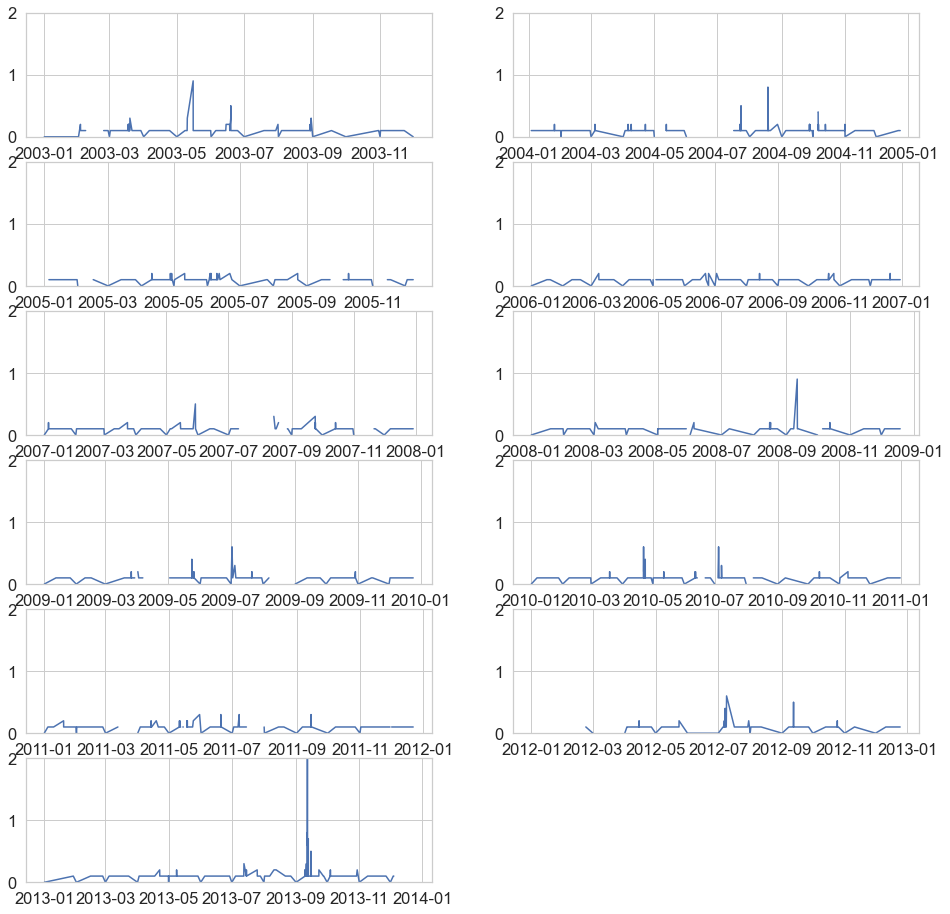

In [14]:
plt.figure(figsize=(16, 16))
for i in range(11):
    plt.subplot(6, 2, i+1)
    plt.plot(boulder_precip_2003_2013[str(2003+i)].HPCP)
    plt.ylim([0, 2])
    
plt.show()

Regardons ce pic en 2013

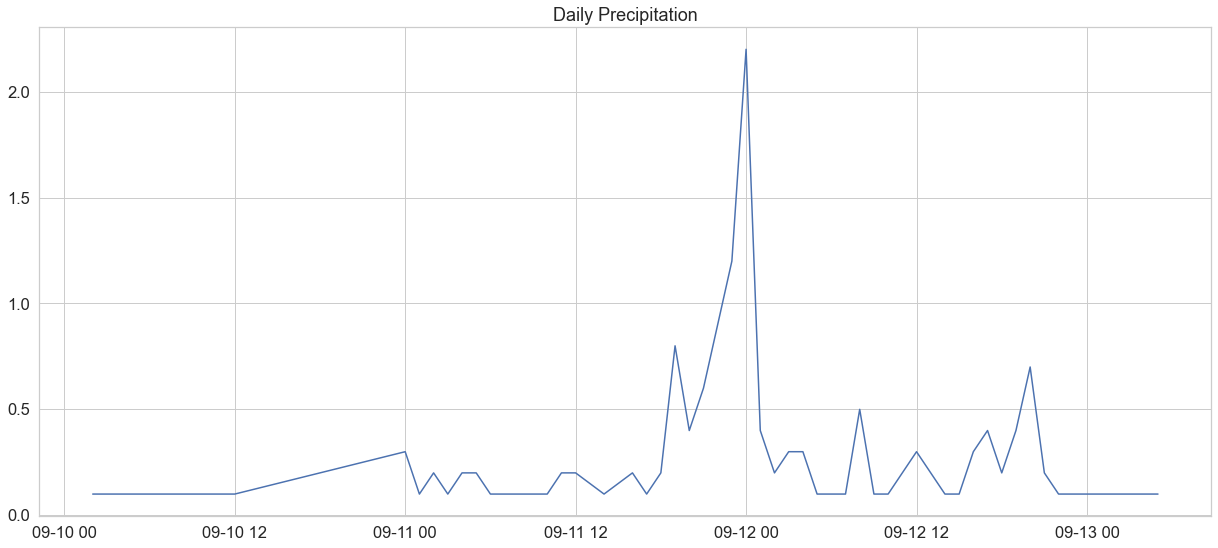

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [15]:
plt.figure(figsize=(21, 9))
plt.plot(boulder_precip_2003_2013['2013-09-10':'2013-09-13'].HPCP)
plt.title("Daily Precipitation")
plt.show()

boulder_precip_2003_2013.describe()

[Back to top](#topEODataScience)

## 1.2. Dates

Dataset of daily temperature (maximum in Fahrenheit) and total precipitation (inches) in July 2018 for Boulder, CO, provided by the National Oceanic and Atmospheric Administration (NOAA).

In [16]:
def df_info(df):
    print('--- Dataframe Info ---')
    boulder_july_2018.info()
    print('\n--- Dataframe describe ---\n', boulder_july_2018.describe())
    print('\n--- Dataframe types ---\n', boulder_july_2018.dtypes)
    return boulder_july_2018.head(3)

In [17]:
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.get_data(url=file_url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file
file_path = os.path.join("data", "earthpy-downloads",
                         "july-2018-temperature-precip.csv")

# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_path)

df_info(boulder_july_2018)

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes

--- Dataframe describe ---
         max_temp      precip
count  31.000000   31.000000
mean   88.129032  -96.618065
std     6.626925  300.256388
min    75.000000 -999.000000
25%    84.000000    0.000000
50%    88.000000    0.000000
75%    94.000000    0.050000
max    97.000000    0.450000

--- Dataframe types ---
 date         object
max_temp      int64
precip      float64
dtype: object


,date,max_temp,precip
0,2018-07-01,87,0.0
1,2018-07-02,92,0.0
2,2018-07-03,90,-999.0


Il y a déjà une chose surprenante à remarquer : la précipitation négative. On peut supposer qu'un précipitation de "-999" signifie "pas de données".

La temperature doit etre en F° et nous avons des data  journalières pour le mois de juillet 2018.

Transformons un peu ce dataframe :

In [18]:
# Re opn csv with date as index
boulder_july_2018 = pd.read_csv(file_path, index_col='date', parse_dates=True)

# Add column °C
boulder_july_2018['max_temp_C'] = (boulder_july_2018['max_temp'] - 32) * 5/9
# Add column where precip == -999.0
boulder_july_2018['precip_nan'] = boulder_july_2018['precip'] == -999.0
# Change precip values when equal to -999.0
boulder_july_2018.loc[boulder_july_2018['precip'] == -999.0, 'precip'] = np.nan
# Add column cm
boulder_july_2018['precip_cm'] = boulder_july_2018['precip'] * 2.54

df_info(boulder_july_2018)

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   max_temp    31 non-null     int64  
 1   precip      28 non-null     float64
 2   max_temp_C  31 non-null     float64
 3   precip_nan  31 non-null     bool   
 4   precip_cm   28 non-null     float64
dtypes: bool(1), float64(3), int64(1)
memory usage: 1.2 KB

--- Dataframe describe ---
         max_temp     precip  max_temp_C  precip_cm
count  31.000000  28.000000   31.000000  28.000000
mean   88.129032   0.065714   31.182796   0.166914
std     6.626925   0.120936    3.681625   0.307176
min    75.000000   0.000000   23.888889   0.000000
25%    84.000000   0.000000   28.888889   0.000000
50%    88.000000   0.000000   31.111111   0.000000
75%    94.000000   0.055000   34.444444   0.139700
max    97.000000   0.450000   36.111111   1.143000

--- Dataframe types 

,max_temp,precip,max_temp_C,precip_nan,precip_cm
date,,,,,
2018-07-01,87,0.0,30.555556,False,0.0
2018-07-02,92,0.0,33.333333,False,0.0
2018-07-03,90,NaN,32.222222,True,NaN


Total precipitation during July 2018 : 4.6736 cm.



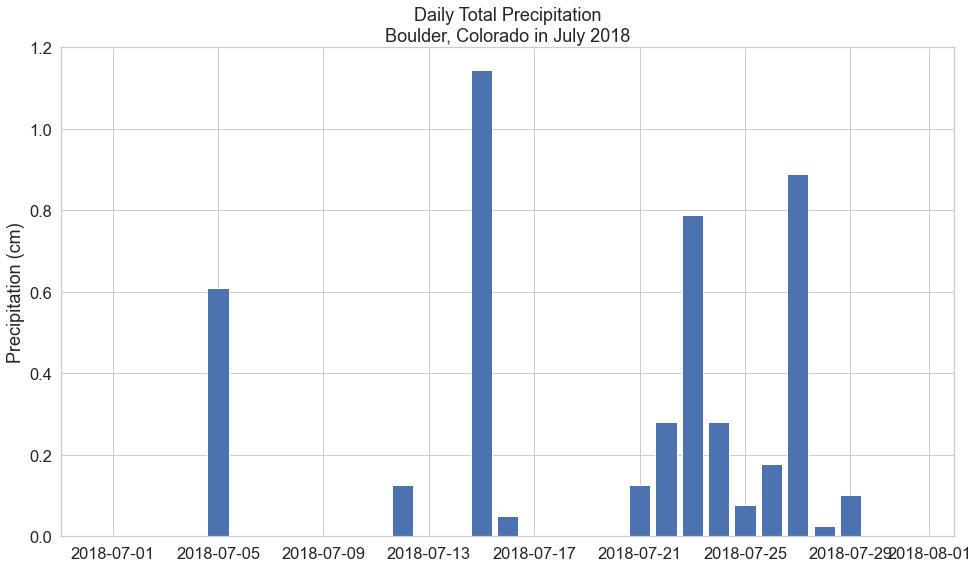

In [19]:
plt.figure(figsize=(16,9))
plt.bar(boulder_july_2018.index, height=boulder_july_2018.precip_cm)
plt.title("Daily Total Precipitation\nBoulder, Colorado in July 2018")
plt.ylabel("Precipitation (cm)")

print(f'Total precipitation during July 2018 : {boulder_july_2018.precip_cm.sum()} cm.\n')

(un peu la flemme de finir l'exo, je connais le fonctionnement, si ça vous interesse, jetez un oeil à [ce cours](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/), ainsi qu'au suivant que je passe aussi :
- Subset timeseries
- Resample timeseries
- Custom date format for plots


## 1.3. Timeseries challenge
Flemme de le faire aussi pour le moment

[Back to top](#topEODataScience)

---

## 1.4. Flood Return and Exceedance Probability Calculations 

One way to analyze time series data - particularly related to events like floods - is to calculate the frequency of different magnitude events. The term “100-year flood” refers to the flood magnitude that has a probability of exceedance of 1/100 in any given year (i.e., a 1% chance). This is why the hundred year flood event can occur two years in a row.

To begin, let’s define two terms:
- *Exceedance probability*: the probability of a given magnitude event or greater to occur.
- *Recurrence interval*: the average time of exceedance is the inverse of the exceedance probability.

**Important Considerations**
- The above definitions assume that flood events in the time series are independent (i.e., that event magnitudes are not correlated with each other in time) and that the process is stationary (i.e., that the probability distribution of events is not changing through time).
- Even though the phrase “recurrence interval” evokes the idea of regularity in the time between events, this is an important misconception (recall our assumption of independence). The 100-year flood is just as likely to occur after a year that already experienced a 100-yr flood as any other year.

The content below comes from this [USGS waterscience page](https://www.usgs.gov/special-topic/water-science-school/science/100-year-flood?qt-science_center_objects=0#qt-science_center_objects). It provides an excellent overview of recurrence intervals and return periods.

**Annual Exceedance Probability**
> The USGS and other agencies often refer to the percent chance of occurrence as an Annual Exceedance Probability or AEP. An AEP is always a fraction of one. So a 0.2 AEP flood has a 20% chance of occurring in any given year, and this corresponds to a 5-year recurrence-interval flood. Recurrence-interval terminology tends to be more understandable for flood intensity comparisons. However, AEP terminology reminds the observer that a rare flood does not reduce the chances of another rare flood within a short time period.

We will use the hydrofunctions python package to access streamflow data via an API from the United States Geological Survey (USGS) National Water Information System (NWIS) website.

In [20]:
# Import packages
import os
import urllib
import requests
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
try :
    import hydrofunctions as hf
except:
    # If you don't have hydrofunctions, pip install it
    !pip install hydrofunctions
    import hydrofunctions as hf

# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Get the data & set working director
data = et.data.get_data('colorado-flood')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [21]:
# Create map of stations
hf.draw_map()

For the purposes of this lesson, you will use gage dv06730500 This gage along Boulder Creek survived the 2013 flood event and is one of the longest time series datasets along Boulder Creek.

In [22]:
from datetime import date

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = date.today().strftime("%Y-%m-%d")

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

# Get metadata about the data
hf.get_nwis(site, 'dv').json()

# Get the data in a pandas dataframe format
longmont_discharge = hf.extract_nwis_df(longmont_resp)
longmont_discharge = pd.DataFrame(longmont_discharge[0])

# Rename columns
longmont_discharge.columns = ["discharge", "flag"]

longmont_discharge

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&startDT=1946-05-10&endDT=2021-06-29
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500


,discharge,flag
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A
...,...,...
2021-06-24 00:00:00+00:00,26.1,P
2021-06-25 00:00:00+00:00,81.4,P
2021-06-26 00:00:00+00:00,420.0,P


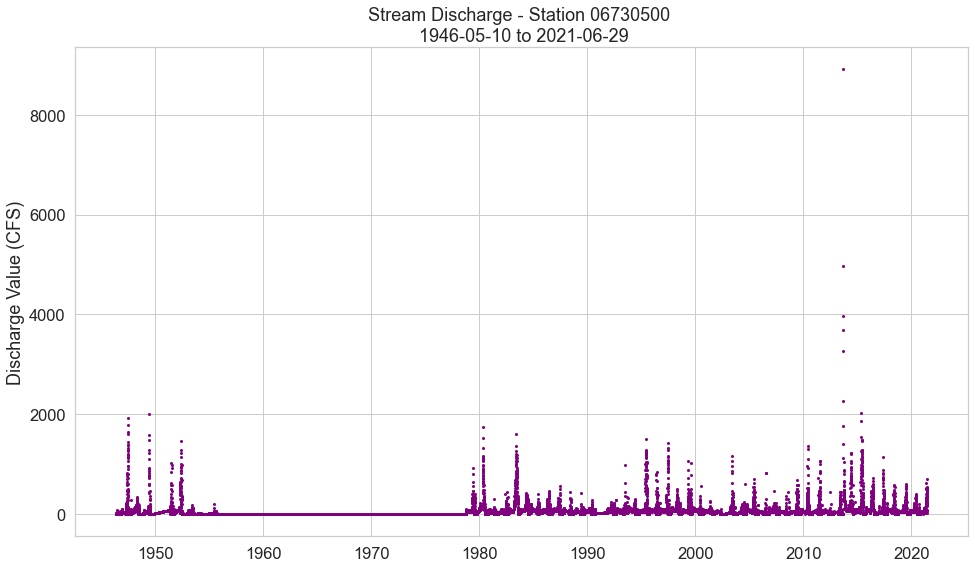

In [23]:
plt.figure(figsize=(16, 9))

plt.scatter(x=longmont_discharge.index,
           y=longmont_discharge["discharge"],
           marker="o",
           s=4,
           color="purple")

plt.ylabel("Discharge Value (CFS)")
plt.title("Stream Discharge - Station {} \n {} to {}".format(site, start, end))

plt.show()

Étudions le maximum pour chaque année:

[ref pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

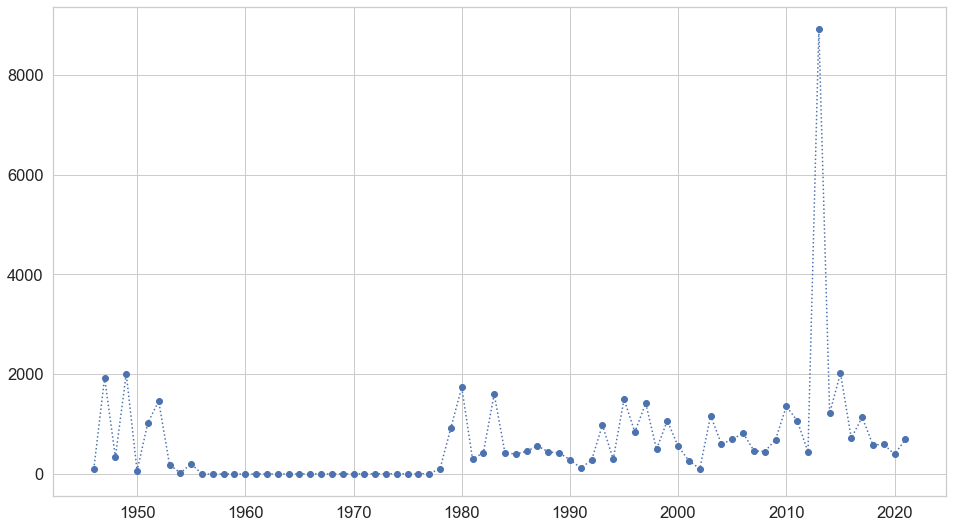

In [24]:
plt.figure(figsize=(16,9))
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
plt.plot(longmont_discharge_annual_max.discharge,
        linestyle=':',
        marker='o', label="Mean Daily Value")

**Calculate Return Period**
Now that you have both datasets, you are ready to calculate the return period from each. You will calculate this value and the associated probability of each event size for both the USGS max annual flow data and for the max flow value that you derived from the mean daily data. To calculate return period you will do the following:
1. Sort your data from smallest to largest.
2. Calculate exceedance probabilities using the equation below where n is length of the record and i is the rank.
3. Calculate the inverse of the exceedance probabilities to determine return period in years.
4. Plot flood magnitudes against return time. It is common to plot these kinds of data on log-linear or log-log axes.

**Exceedance probability equation**:
$$
probability = \frac{n - i + 1}{n + 1}
$$
where i is the rank order (smallest to largest) from 1 to n. Note that the limits of this equation vary from n/(n+1) ~ 1 for the smallest events and 1/(n+1) for the largest events (i.e., the largest events have a very small exceedance probability).

In [25]:
# Sort data smallest to largest
longmont_discharge_sorted = longmont_discharge.sort_values(by="discharge")

# Count total obervations
n = longmont_discharge_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
longmont_discharge_sorted.insert(0, 'rank', range(1, n + 1))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
longmont_discharge_sorted["probability"] = ((n - longmont_discharge_sorted["rank"] + 1) / (n + 1))
longmont_discharge_sorted["return-years"] = (1 / longmont_discharge_sorted["probability"]) / 365.25
longmont_discharge_sorted

,rank,discharge,flag,probability,return-years
datetimeUTC,,,,,
1946-06-25 00:00:00+00:00,1,0.0,A,0.999964,0.002738
1954-08-10 00:00:00+00:00,2,0.0,A,0.999927,0.002738
1946-07-05 00:00:00+00:00,3,0.0,A,0.999891,0.002738
1954-08-08 00:00:00+00:00,4,0.1,A,0.999854,0.002738
1955-04-26 00:00:00+00:00,5,0.2,A,0.999818,0.002738
...,...,...,...,...,...
2013-09-16 00:00:00+00:00,27440,3270.0,"A,e",0.000182,15.028063
2013-09-12 00:00:00+00:00,27441,3680.0,A,0.000146,18.785079
2013-09-15 00:00:00+00:00,27442,3970.0,"A,e",0.000109,25.046772


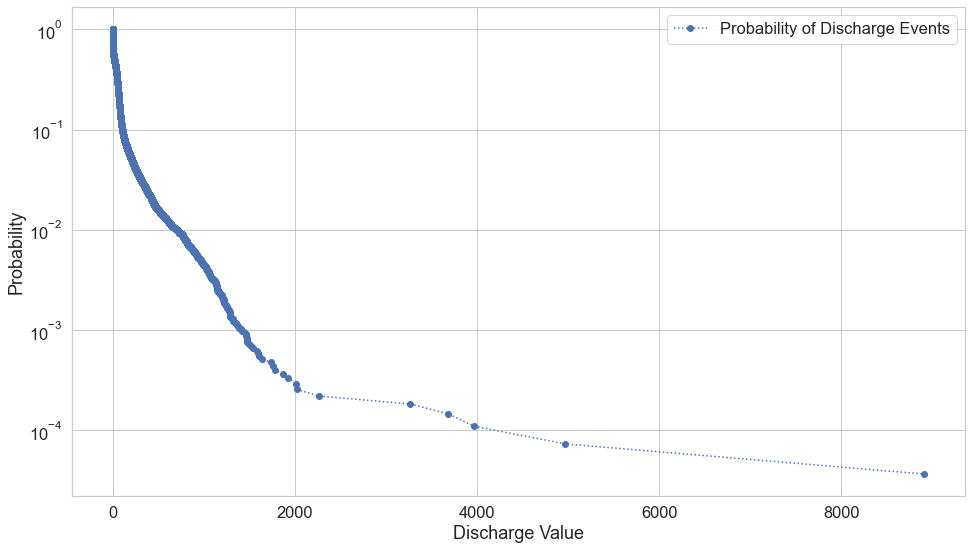

In [26]:
# On plot
plt.figure(figsize=(16,9))
plt.plot(
        longmont_discharge_sorted.discharge,
        longmont_discharge_sorted.probability,
        linestyle=':',
        marker='o', label="Probability of Discharge Events")
plt.ylabel("Probability")
plt.xlabel("Discharge Value")
plt.yscale('log')
plt.legend()
plt.show()

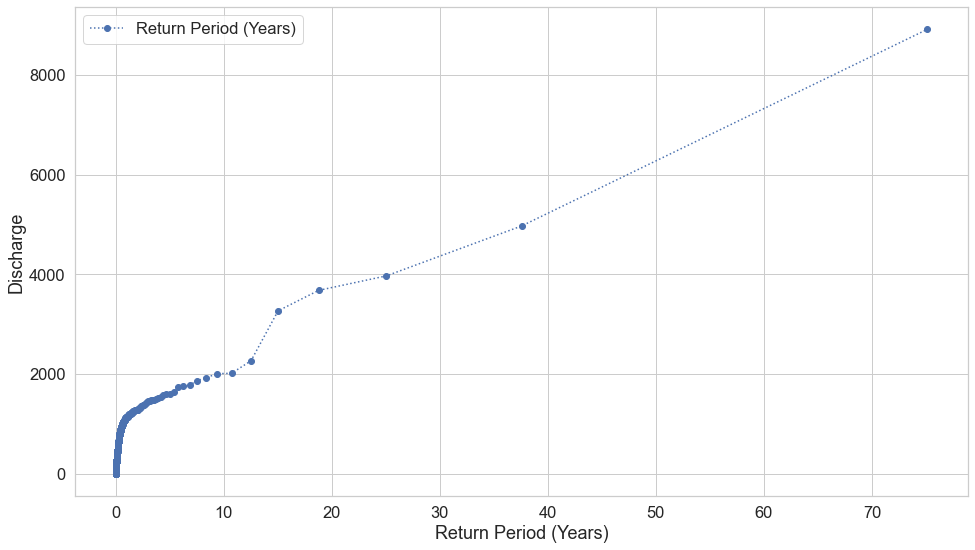

In [27]:
# On plot
plt.figure(figsize=(16,9))
plt.plot(
        longmont_discharge_sorted['return-years'],
        longmont_discharge_sorted.discharge,
        linestyle=':',
        marker='o', label="Return Period (Years)")
plt.ylabel("Discharge")
plt.xlabel("Return Period (Years)")
#plt.yscale('log')
plt.legend()
plt.show()

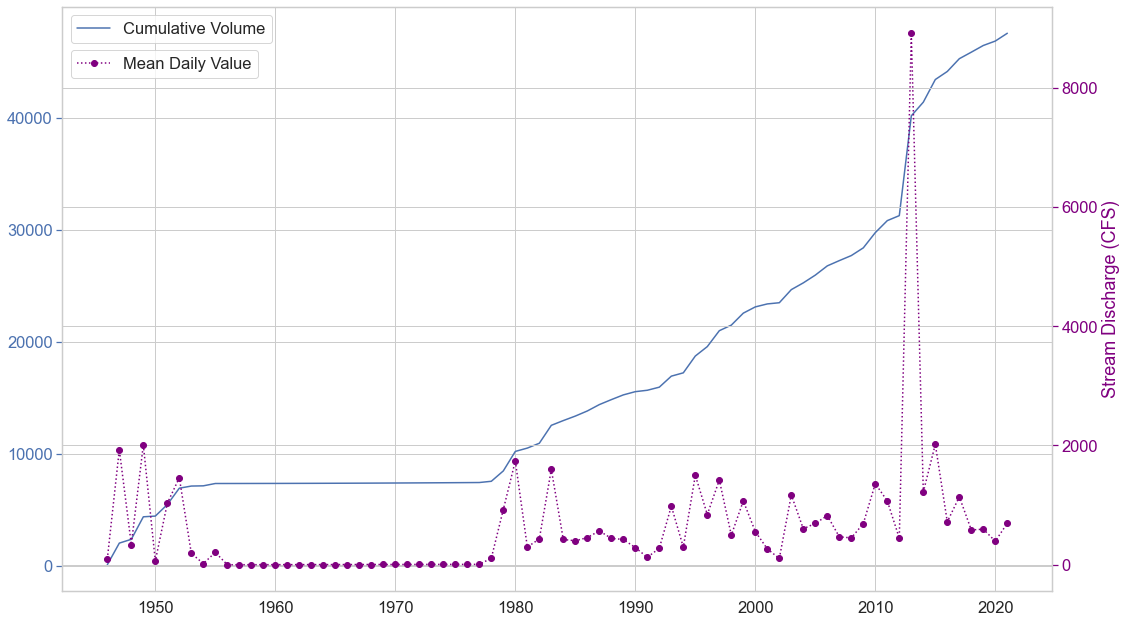

In [28]:
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
longmont_discharge_annual_max['discharge_cumsum'] = longmont_discharge_annual_max.discharge.cumsum()

fig, ax = plt.subplots(figsize=(16,9))
ax2 = ax.twinx()

# First plot
ax.plot(longmont_discharge_annual_max.discharge_cumsum, label="Cumulative Volume")
ax.tick_params('y', colors='b')

# Second plot
ax2.plot(longmont_discharge_annual_max.discharge, color ="purple", 
        linestyle=':',
        marker='o', label="Mean Daily Value")
ax2.set_ylabel('Stream Discharge (CFS)', color='purple')
ax2.tick_params('y', colors='purple')

# Plot
ax.legend()
ax2.legend(loc = "upper left", bbox_to_anchor=(0.0, 0.94))
fig.tight_layout()
fig.show()

[Back to top](#topEODataScience)

---

# 2. Intro to Spatial Vector Data 

## 2.1. Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as vertices that define the “shape” of the spatial object. The organization of the vertices determines the type of vector that you are working with. There are three types of vector data:

![](https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)

A shapefile is created by 3 or more files, all of which must retain the same NAME and be stored in the same file directory, in order for you to be able to work with them. There are 3 key files associated with any and all shapefiles:
- .shp: the file that contains the geometry for all features.
- .shx: the file that indexes the geometry.
- .dbf: the file that stores feature attributes in a tabular format.

Sometimes, a shapefile will have other associated files including:
- .prj: the file that contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
- .sbn and .sbx: the files that are a spatial index of the features.
- .shp.xml: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

In [29]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# Get data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


he shapefiles that you will import are:
- A polygon shapefile representing our field site boundary,
- A line shapefile representing roads, and
- A point shapefile representing the location of field sites at the San Joachin field site.

In [30]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)
sjer_plot_locations

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.390 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


In [31]:
# Coordinate Reference System (CRS): the projection of the data.
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# View the spatial extent
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [33]:
# features (rows, columns)
sjer_plot_locations.shape

(18, 6)

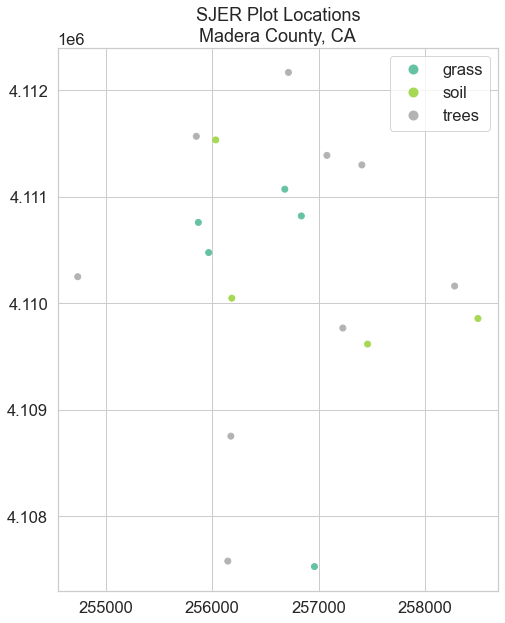

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         cmap="Set2",
                         ax=ax)
# Add a title
ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

In [35]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude'}, xlabel='Longitude (Degrees)', ylabel='Latitude (Degrees)'>)

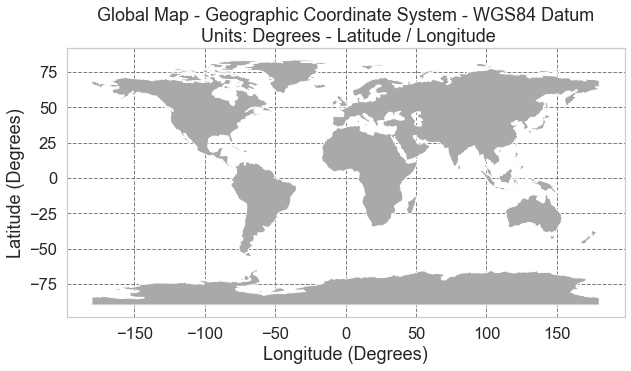

In [36]:
def plot_map():
    # Plot worldBound data using geopandas
    fig, ax = plt.subplots(figsize=(10, 5))
    worldBound.plot(color='darkgrey', 
                    ax=ax)
    # Set the x and y axis labels
    ax.set(xlabel="Longitude (Degrees)",
           ylabel="Latitude (Degrees)",
           title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

    # Add the x y graticules
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', 
                  linestyle='dashed')
    ax.xaxis.grid(color='gray', 
                  linestyle='dashed')
    
    return fig, ax
plot_map()

In [37]:

from shapely.geometry import Point

<AxesSubplot:title={'center':'Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude'}, xlabel='Longitude (Degrees)', ylabel='Latitude (Degrees)'>

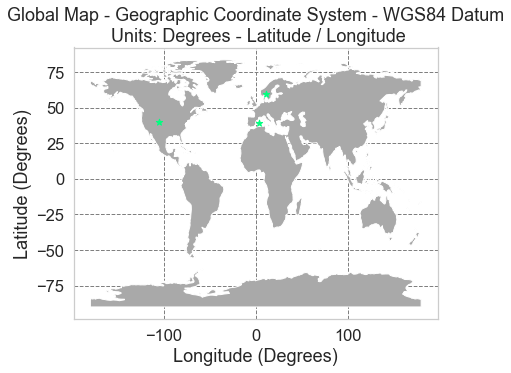

In [38]:
cities = np.array([
    [-105.2519, 40.0274],  # Boulder, Colorado
    [  10.7500, 59.9500],  # Oslo, Norway
    [   2.9833, 39.6167]   # Mallorca, Spain
])
city_locations = [Point(xy) for xy in cities]
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)

fig, ax = plot_map()
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

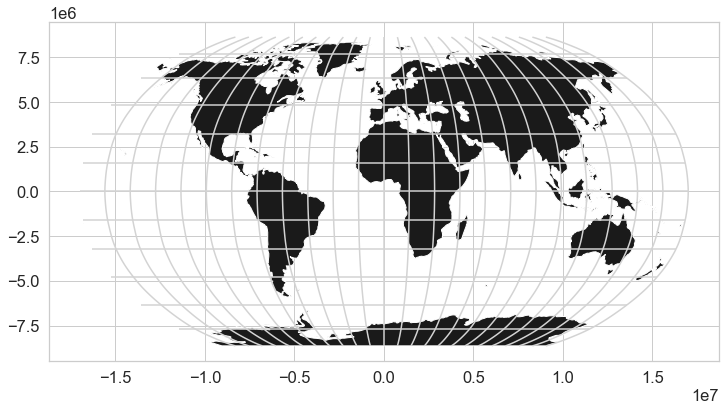

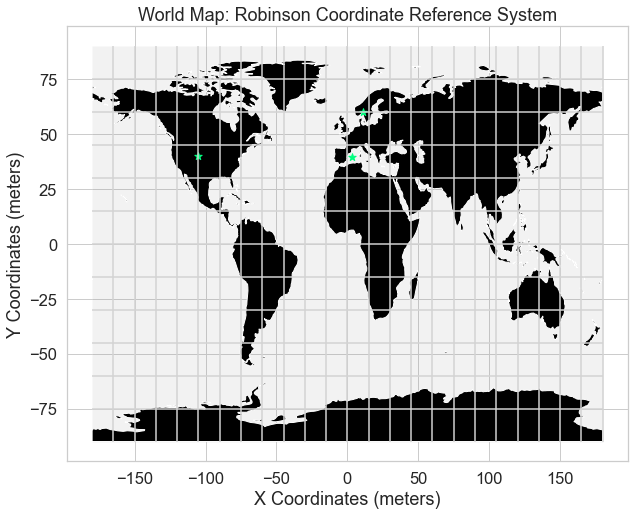

In [40]:
from matplotlib.ticker import ScalarFormatter

# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)



# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')





# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)


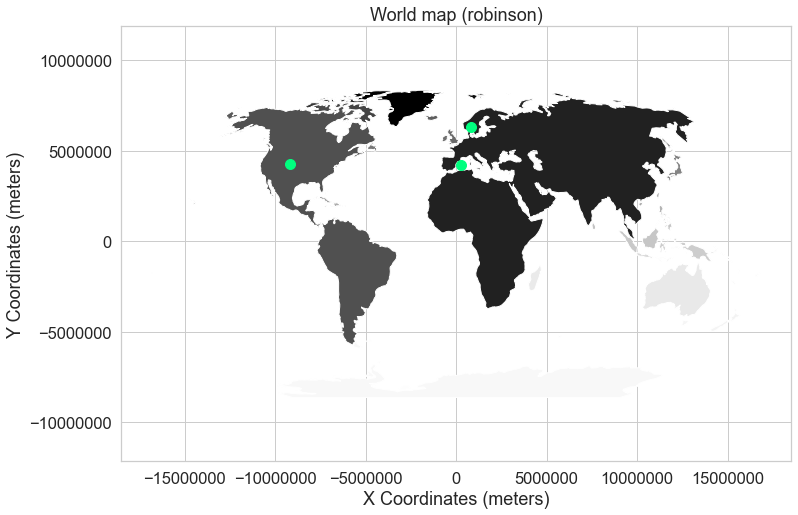

In [41]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');


En résumé :

CRS : coordinate reference system

Attention pleins de formats différents adaptés à certaines régions du globe mais jamais toutes en même temps car difficulté de représenter une boule en 2D.
> Uilisation de code EPSG pour repérer une région.

Map toujours déformé sachant cette difficultée (il est intéressant de voir la petite taille de l'Afrique en général sur les cartes, et l'immense taille de la Russie)

On peut utiliser le format `proj.4` afin de spécifier via une chaine de caractère l'ellispe, la projection et une zone (si UTM), le datum, l'unité... : 
- UTM : `+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0`
- geo : `+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0`



In [42]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
#  Create a CRS Object in Python

# Create a numpy array with x,y location of Boulder
boulder_xy = np.array([[476911.31, 4429455.35]])

# Create shapely point object
boulder_xy_pt = [Point(xy) for xy in boulder_xy]

# Convert to spatial dataframe - geodataframe -- assign the CRS using epsg code
boulder_loc = gpd.GeoDataFrame(boulder_xy_pt,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

# View crs of new spatial points object
boulder_loc.crs


<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada between 108°W and 102°W onshore and offshore - Northwest Territories, Nunavut, Saskatchewan.
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

epsg:4269
epsg:32611


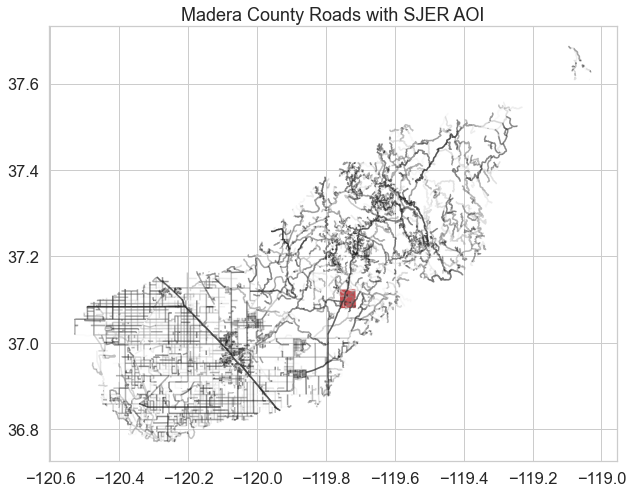

In [47]:
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Import the data
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# aoi stands for area of interest
sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# View the Coordinate Reference System of both layers 
print(sjer_roads.crs)
print(sjer_aoi.crs)

# Reproject the aoi to match the roads layer
sjer_aoi_wgs84  = sjer_aoi.to_crs(epsg=4269)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color='r')

ax.set_title("Madera County Roads with SJER AOI");

In [27]:
import eolearn

[Back to top](#topEODataScience)

---

Thibault **Santonja**

2021